# 1. Smoothing ( gausian, avg, w_avg, median, py_gaus, py_part_blur)
### - OpenCV2: Gaussing BLur, Median Blur, Average Blur, Wieghted Average (filter2D)
###   - PIL: Gaussing Blur, Blur part of img
 
 
# 2. Filter ( min, max)
###  PIL - Min Filter ( image Darkening)
###  PIL - Max Fliter ( Image Brightening)

# 3. Noise Reduction
###  OpenCV2 -  Bilateral Filter
###   OpenCV2  - Gaussing Blur


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

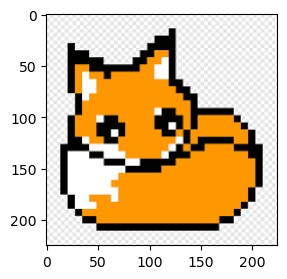

In [17]:
img = cv2.imread('images.png')
img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3,3))
plt.imshow(img )

# Smoothing Filters

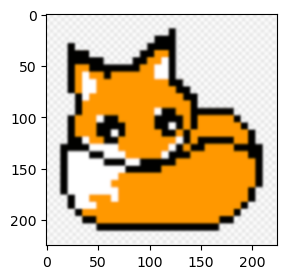

In [18]:
# 1. gaussing blur
# increase kernel size to blur more 
gaus_blur = cv2.GaussianBlur(img, (5,5), 0)
plt.figure(figsize=(3,3))
plt.imshow(gaus_blur)

In [32]:
imgx = Image.fromarray(img.astype('uint8')) 

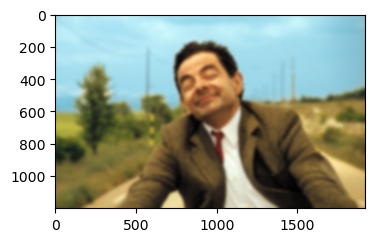

In [34]:
# 2. python lib ( full img)

from PIL import Image, ImageFilter
#img1 = Image.open("images.png")
img1 = Image.open('bean.jpg')
py_gaus_blur = img1.filter(ImageFilter.GaussianBlur(radius= 8))

plt.figure(figsize=(4,4))
plt.imshow(py_gaus_blur)


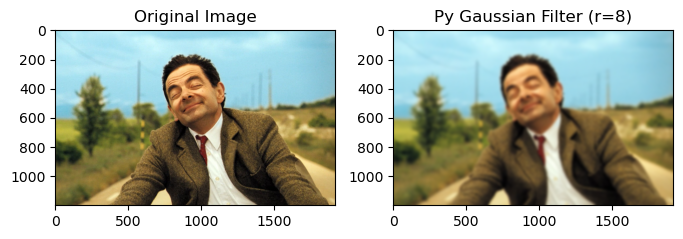

In [20]:
plt.figure(figsize=(8,5))
plt.subplot(221).set_title("Original Image"), plt.imshow(img1)
plt.subplot(222).set_title("Py Gaussian Filter (r=8)"), plt.imshow(py_gaus_blur);

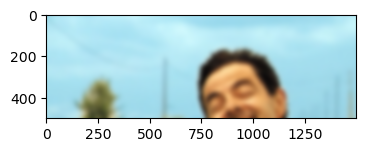

In [21]:
# 3. python lib (small part of img img )
#BOX  left, up, right, low
from PIL import Image, ImageFilter
img2 = Image.open('bean.jpg')
box = (0,0, 1500, 500)
img2_part = img2.crop(box)
part_blur = img2_part.filter(ImageFilter.GaussianBlur(radius= 10))
img2.paste(part_blur, (0,0))
plt.figure(figsize=(4,4))
plt.imshow(part_blur)


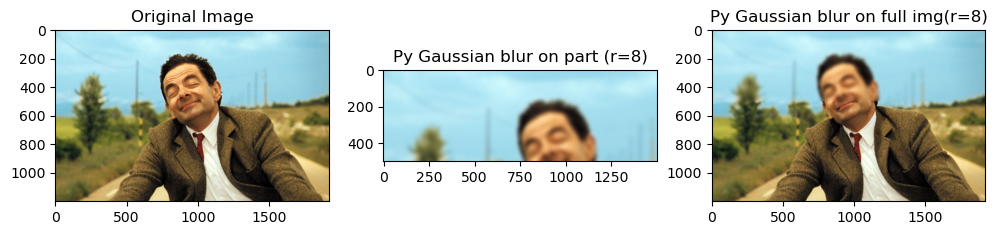

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(231).set_title("Original Image"), plt.imshow(img1)
plt.subplot(232).set_title("Py Gaussian blur on part (r=8)"), plt.imshow(part_blur)
plt.subplot(233).set_title("Py Gaussian blur on full img(r=8)"), plt.imshow(img2);

# Median Blur

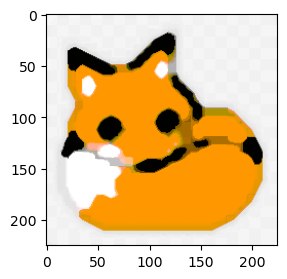

In [23]:
# 250 % noise added
median_blur = cv2.medianBlur(img,  ksize= 15)
plt.figure(figsize=(3,3))
plt.imshow(median_blur)

# Avg Blur

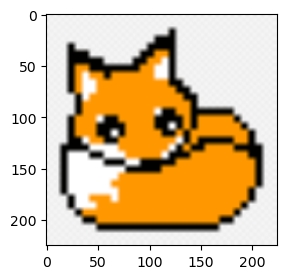

In [24]:

avg_blur = cv2.blur(img, (5,5))
plt.figure(figsize=(3,3))
plt.imshow(avg_blur)

# Weighted Avg Blur

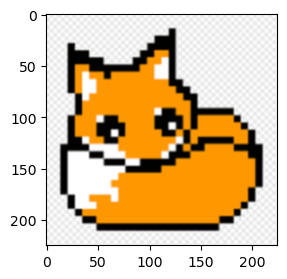

In [37]:
k = np.array([[1,2,1],[2,1,2],[1,2,1]], dtype= int)
w = k.sum() # weight
kernel = k/w
w_avg_blur = cv2.filter2D(img, -1,kernel)
plt.figure(figsize=(3,3))
plt.imshow(w_avg_blur)

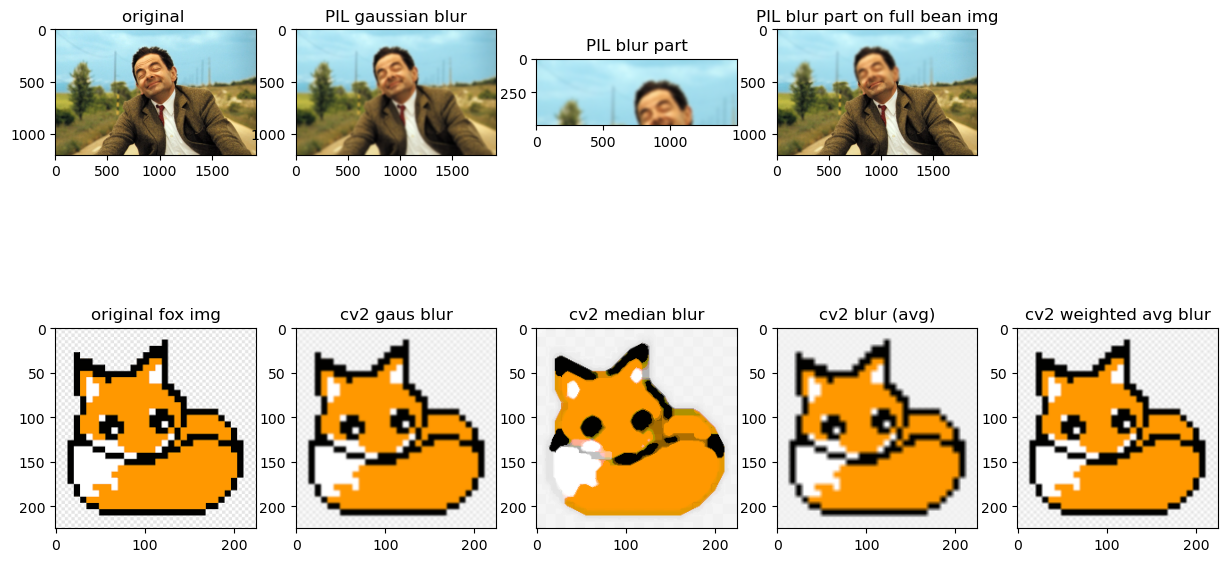

In [26]:
plt.figure(figsize=(15,8))
    
plt.subplot(2,5,1).set_title('original '),plt.imshow(img1)
plt.subplot(2,5,2).set_title('PIL gaussian blur'),plt.imshow(py_gaus_blur)
plt.subplot(2,5,3).set_title('PIL blur part'),plt.imshow(part_blur)
plt.subplot(2,5,4).set_title('PIL blur part on full bean img'),plt.imshow(img2)



plt.subplot(2,5,6).set_title('original fox img'),plt.imshow(img)
plt.subplot(2,5,7).set_title('cv2 gaus blur'),plt.imshow(gaus_blur)
plt.subplot(2,5,8).set_title('cv2 median blur'),plt.imshow(median_blur)
plt.subplot(2,5,9).set_title('cv2 blur (avg)'),plt.imshow(avg_blur)
plt.subplot(2,5,10).set_title('cv2 weighted avg blur'),plt.imshow(w_avg_blur, );

# Min and max Filter

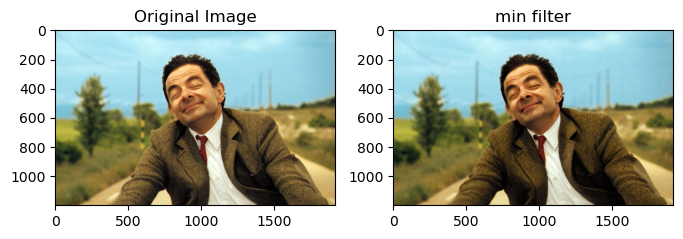

In [27]:
# using PIL for min and max filter 

# 1. Min filter darjens img
from PIL import Image, ImageFilter
img3 = Image.open('bean.jpg')

min_filter = img3.filter(ImageFilter.MinFilter(size = 5))

plt.figure(figsize=(8,5))
plt.subplot(221).set_title("Original Image"), plt.imshow(img3)
plt.subplot(222).set_title("min filter"), plt.imshow(min_filter);

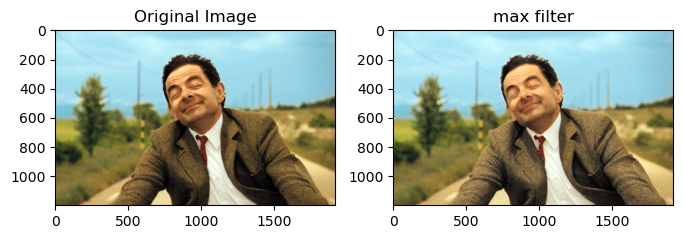

In [28]:
#2.  Max filter (brightens img)

max_filter = img3.filter(ImageFilter.MaxFilter(size = 5))

plt.figure(figsize=(8,5))
plt.subplot(221).set_title("Original Image"), plt.imshow(img3)
plt.subplot(222).set_title("max filter"), plt.imshow(max_filter);

# Noise Reduction 

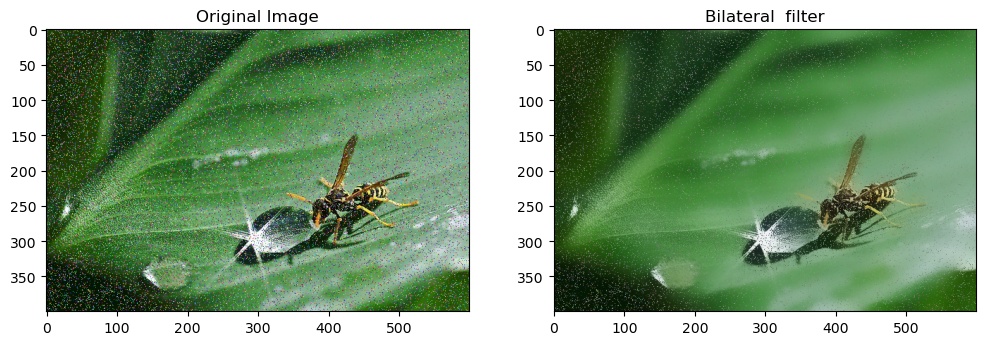

In [29]:
# 3. bilateral filter (NOISE REDUCTION)
# using cv2 bilateral filter
img4 = cv2.imread('wasp.png')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
bi_filter = cv2.bilateralFilter(img4, 35, 135, 135 )


plt.figure(figsize=(12,12))
plt.subplot(221).set_title("Original Image"), plt.imshow(img4)
plt.subplot(222).set_title("Bilateral  filter"), plt.imshow(bi_filter);

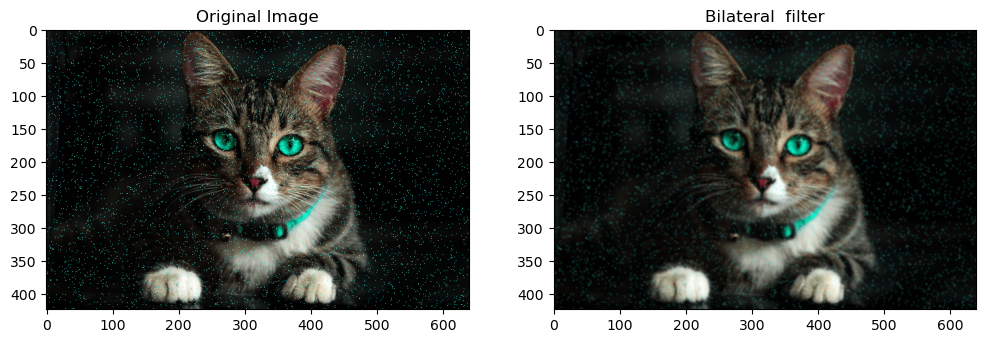

In [30]:
# gaussian filter on noisy img

img5 = cv2.imread('cat.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
gaus_filter = cv2.GaussianBlur(img5, (5,5), 0)


plt.figure(figsize=(12,12))
plt.subplot(221).set_title("Original Image"), plt.imshow(img5)
plt.subplot(222).set_title("Bilateral  filter"), plt.imshow(gaus_filter);